In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = ["2Mu2E_100GeV_5GeV_400mm"]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", "pvAndCosmic_cuts"] #"2mu2e"
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts


# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

Text(1, 0, 'Δηseed')

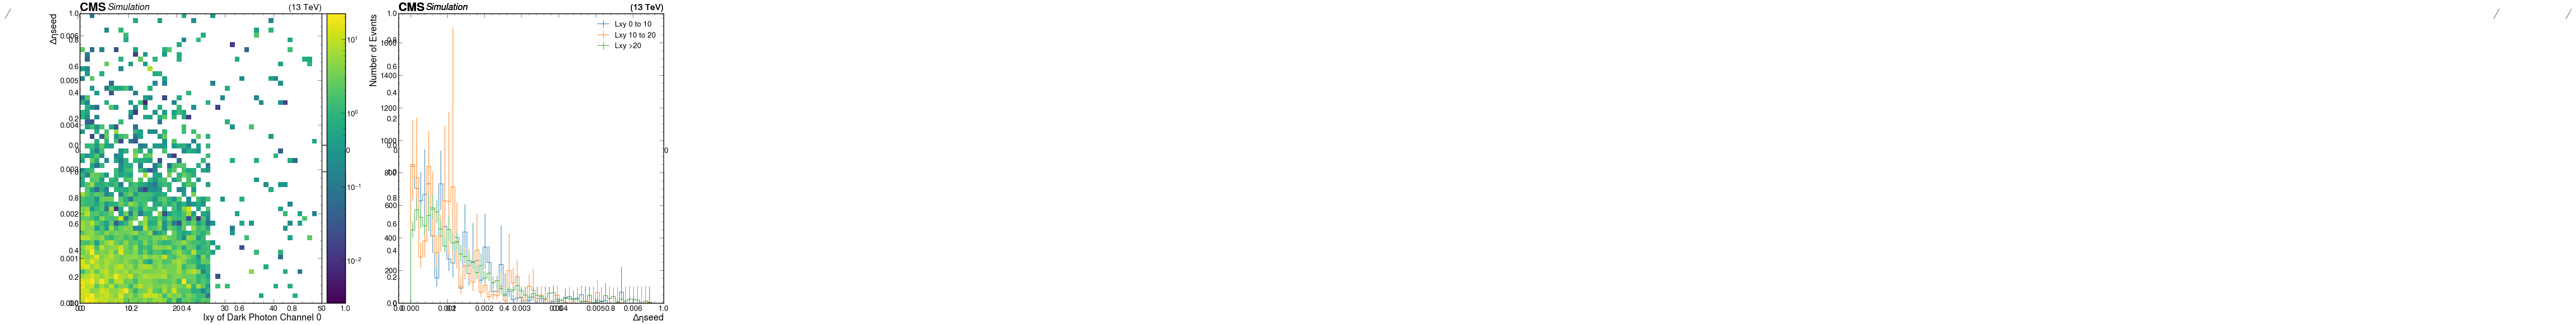

In [3]:
 for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 3, sum),:34]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed")

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(1, 0, '∆φin')

/opt/conda/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


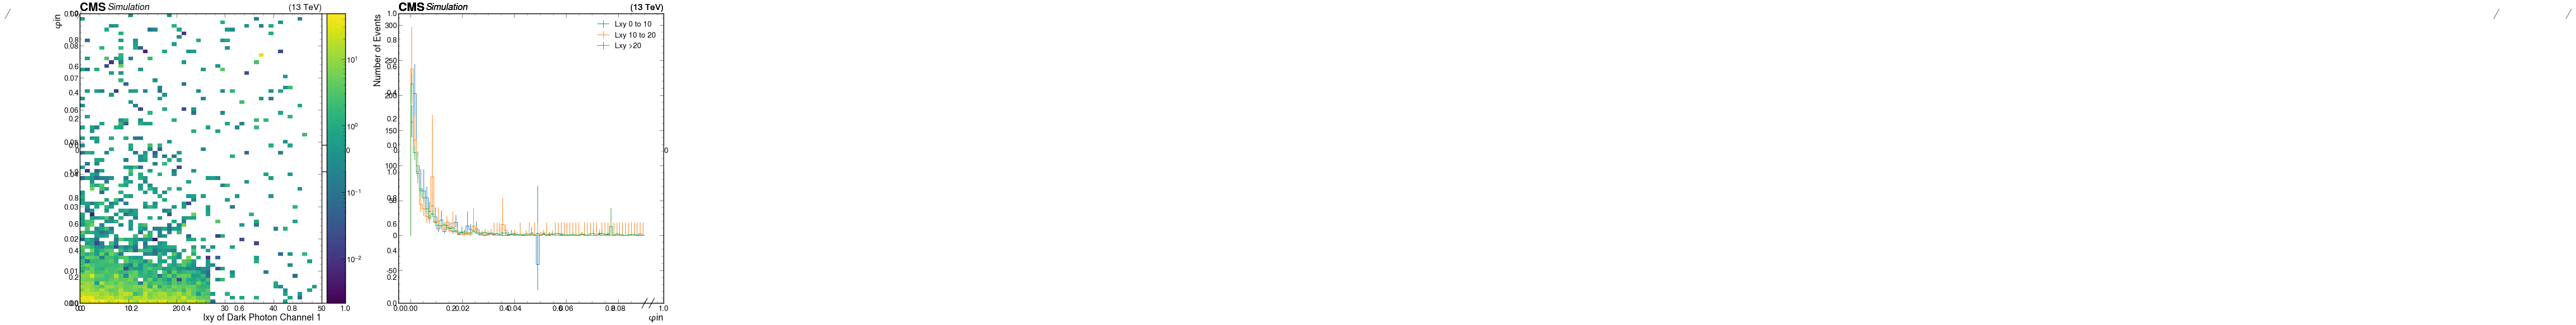

In [4]:
 for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("∆φin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 3, sum),:75])   
plt.ylabel("Number of Events")
plt.xlabel("∆φin")

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

Text(0, 1, '|1/E - 1/p|')

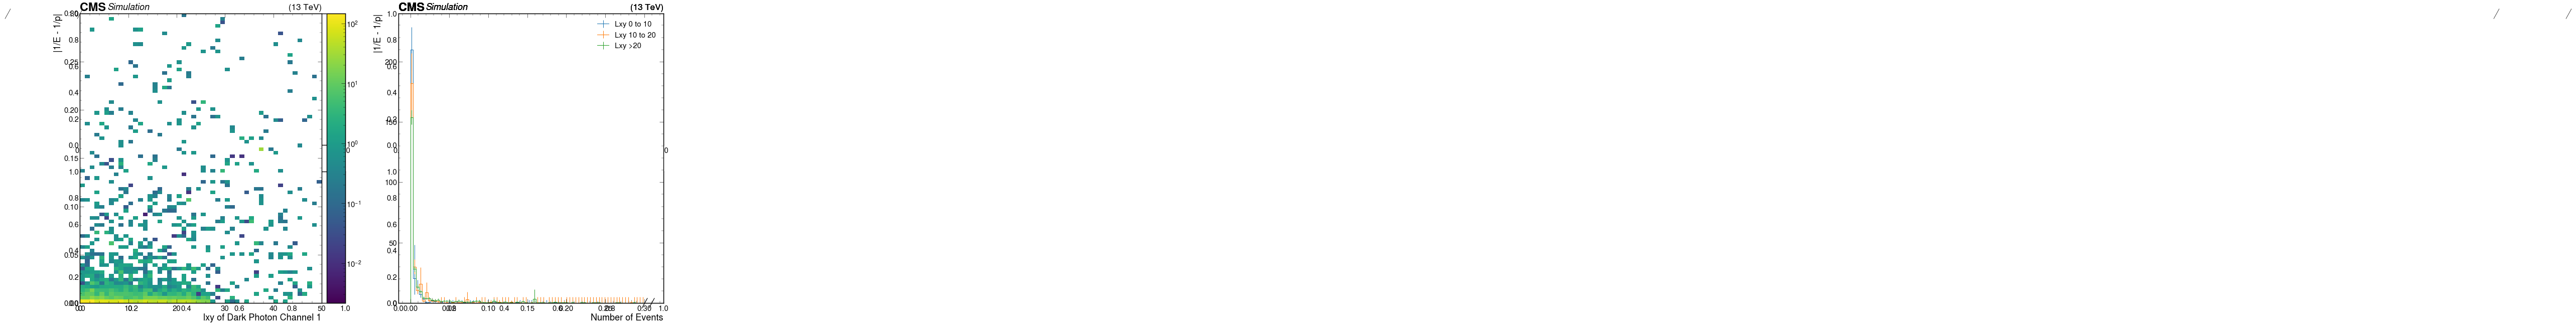

In [5]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("|1/E - 1/p|")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(3, 101, sum),: 52])   
plt.xlabel("Number of Events")
plt.ylabel("|1/E - 1/p|")

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

In [ ]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Isolation")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

Text(0, 1, 'Isolation')

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

In [ ]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(2, 101, sum),: 33])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

In [ ]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Conversion Veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
#change the lxy for all other variables to these
plt.legend() 
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(2, 101, sum),0])   
plt.xlabel("Number of Events")
plt.ylabel("Conversion Veto")

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

In [ ]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("H/E")

# Expected missing inner hits:

number of missing hits expected for GSF track.

In [ ]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Expected Missing Hits")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
         hists = out[sample]["hists"]
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(3, 101, sum),2: ])   
plt.xlabel("Number of Events")
plt.ylabel("Expected Missing Hits")

# Percentages Failed

In [ ]:
binnumdict = {
    "electron_GsfEleDEtaInSeedCut2d": 35,
    "electron_GsfEleDPhiInCut2d" : 76,
    "electron_GsfEleEInverseMinusPInverseCut2d" : 53 ,
    "electron_GsfEleFull5x5SigmaIEtaIEtaCut2d" : 35 ,
    "electron_GsfEleConversionVetoCut2d" : 1,
    "electron_GsfEleMissingHitsCut2d" : 3 ,
}
#binnum come from the bin number assigned in hist.py (about half), and are- specifically determined from the analysis note number for each ID variable

lxy = [0,2,3,4,5,6,7,102]
#able to change Lxy
hists =  output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]
for histname, binnum in binnumdict.items() : 
    values = output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print()
    print(histname)
    for i in range(0,len(lxy)-1):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        if histname == "electron_GsfEleConversionVetoCut2d" :
            fail = values[lxy[i]:lxy[i+1],binnum].sum()
        else: 
            fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)

In [ ]:
#Totals, Failed, Rate